In [1]:
print('Logistic Regression on Wisconsin Brest Cancer Data')


Logistic Regression on Wisconsin Brest Cancer Data


In [112]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import scipy

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from scipy.special import expit


In [115]:
#column names
col_names = ['Code Number', 'Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

# load dataset
wbcd = pd.read_csv('wbcd.csv', header=None, names=col_names)
wbcdReplacedData = pd.read_csv('wbcdReplacedData.csv', header=None, names=col_names)

#list first 5 rows
wbcd.head()


,Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1017023,4,1,1,3,2,1,3,1,1,2
2,1018561,2,1,2,1,2,1,3,1,1,2
3,1033078,2,1,1,1,2,1,1,1,5,2
4,1033078,4,2,1,1,2,1,2,1,1,2


In [43]:
wbcd.dtypes

Code Number                     int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [118]:
#split dataset in features and target variable
feature_cols = [ 'Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
features= wbcd[feature_cols] # Features
result = wbcd.Class # Target variable
featuresReplacedData= wbcdReplacedData[feature_cols] # Features all data
resultReplacedData = wbcdReplacedData.Class # Target variable all data

In [119]:
# split X and y into training and teting sets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(features, result, test_size=.34, random_state=100)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))


Accuracy: 95.28%


A:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [120]:
# split X and y into training and teting sets for All data
X_train_, X_test_, Y_train_, Y_test_ = model_selection.train_test_split(featuresReplacedData, resultReplacedData, test_size=.34, random_state=100)
model_ = LogisticRegression()
model_.fit(X_train_, Y_train_)
resultReplacedData = model.score(X_test_, Y_test_)
print("Accuracy: %.2f%%" % (resultReplacedData*100.0))




Accuracy: 95.38%


A:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [123]:
#with missing data removed
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[142   3]
 [  8  80]]


In [122]:
#with replaced data
y_pred_ = model_.predict(X_test_)
from sklearn.metrics import confusion_matrix
confusion_matrix_ = confusion_matrix(Y_test_, y_pred_)
print(confusion_matrix_)

[[151   5]
 [  7  75]]


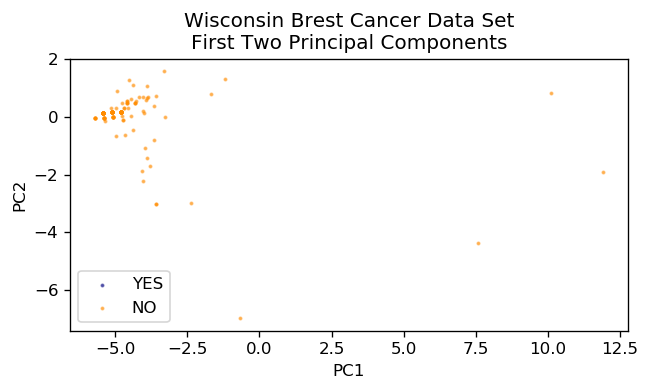

In [126]:
#Needs to be corrected
#Requires dimentionality reduction
#Not used at the moment
from sklearn.decomposition import PCA
X = featuresReplacedData.iloc[:,1:]
y = featuresReplacedData.iloc[:,0]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Wisconsin Brest Cancer Data Set\nFirst Two Principal Components')
plt.xlabel('PC1') #principle component 1
plt.ylabel('PC2') #principle component 2
plt.gca().set_aspect('equal')
plt.show()
